# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

##### Excercise 1
Use the adult.csv dataset and run the codes shown in the following Screenshots. Then answer the questions.

In [4]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.set_index(np.arange(10000,42561),inplace=True)

print(adult_df.iloc[5:7,0:2])

print(adult_df.loc['10005':'10007','age':'fnlwgt'])

       age workclass
10005   37   Private
10006   49   Private
       age         workclass  fnlwgt
10005   37           Private  284582
10006   49           Private  160187
10007   52  Self-emp-not-inc  209642


    a) Use the output to answer what is the difference in the behavior of .loc and .iloc when it comes to slicing.
    b)	Without running but by only looking at the data, what will be the output of adult_df.loc['10000':'10003', 'relationship':'sex'].
    c)	Without running but by only looking at the data, what will be the output of adult_df.iloc[0:3, 7:9].


a) .iloc does not print out the end number while .loc will rpint out the end number that you specify
b) it will give you the relationship and sex of the 10000 - 10003 people
c)

##### Excercise 2 

For adult_df use the .groupby() function to run the following code and create the multi-index Series mlt_sr.

In [2]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     109018.626168
                            >50K      148012.000000
                    Male    <=50K     126428.767857
                            >50K      120721.541667
Asian-Pac-Islander  Female  <=50K     148165.333333
                            >50K      142426.093023
                    Male    <=50K     163885.130435
                            >50K      170698.347639
Black               Female  <=50K     213411.580205
                            >50K      205806.033333
                    Male    <=50K     242343.990566
                            >50K      245390.356902
Other               Female  <=50K     173235.932039
                            >50K      160223.333333
                    Male    <=50K     214891.832168
                            >50K      204551.736842
White               Female  <=50K     183485.120961
                            >50K      184030.255837
                    Male    <

Now that you have created a multi-index Series, run the following codes, study the outputs, and answer the questions.

    a)	Run the code below first and then answer the following. When we use .iloc[] for a multi-index Series or DataFrame, what we should expect?

In [3]:
print(mlt_seris.iloc[0])
print(mlt_seris.iloc[1])
print(mlt_seris.iloc[2])

109018.6261682243
148012.0
126428.76785714286


Answer: 

To get the 1st, 2nd, and 3rd rows of the last column

    b)	Run the code below first and then answer the following. When we use .loc[] to access the data of one of the inner most index level of multi-index Series, what should we expect?

In [5]:
mlt_seris.loc['Other']

sex     income
Female  <=50K     173235.932039
        >50K      160223.333333
Male    <=50K     214891.832168
        >50K      204551.736842
Name: fnlwgt, dtype: float64

Answer: 

To see the other rows be printed out

    c)	 Run the codes below first and then answer the following. When we use .loc[] to access the data of one of non inner most index level of multi-index Series, what should we expect? 

    When you run either line of code below, you will get an error and that is the point of this question. Study the error and try to answer the question. 

In [6]:
mlt_seris.loc['Female']

KeyError: 'Female'

In [7]:
mlt_seris.loc['<=50K']

KeyError: '<=50K'

Answer: 

The thing you are trying to pullout is a subset of other rows as well

    d)	Run the codes below first and then answer the following. How is using .loc[] or .iloc[] different when working with a multi-index Series or a DataFrame?


In [8]:
print(mlt_seris.loc['Other']['Female']['<=50K'])
print(mlt_seris.iloc[12])

173235.93203883496
173235.93203883496


Answer: 

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.

In [24]:
import pandas as pd

billboard_df = pd.read_csv('billboard.csv')

    a)	Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them. 

In [38]:
print(billboard_df.isnull().sum())
billboard_df.dropna(1)

artist      0
track       0
time        0
date_e      0
w1          0
         ... 
w72       317
w73       317
w74       317
w75       317
w76       317
Length: 80, dtype: int64


C:\Users\Cole\AppData\Local\Temp\ipykernel_8160\371628061.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  billboard_df.dropna(1)


,artist,track,time,date_e,w1
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78
1,Santana,"Maria, Maria",4:18,2000-02-12,15
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71
3,Madonna,Music,3:45,2000-08-12,41
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57
...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99


    b)	With a for loop, draw and study the values in each of the remaining W columns.

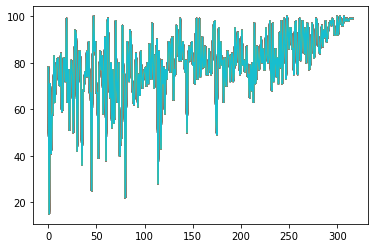

In [31]:
for columns in billboard_df:
    billboard_df.w1.plot()

    c)	The dataset is in wide format, use an appropriate function to switch to a long fromat, and name the melted dataframe mlt_df.

In [46]:
mlt_df = billboard_df.melt(id_vars='artist',
                           value_vars = ['track', 'time', 'date_e', 'w1'],
                           var_name= 'variable',
                           value_name= 'value')

    d)	Write a code that shows mlt_df‘s every 1200 rows.

In [29]:
with pd.option_context('display.max_rows', None,):
    print(mlt_df)

                            artist variable  \
0                  Destiny's Child    track   
1                          Santana    track   
2                    Savage Garden    track   
3                          Madonna    track   
4              Aguilera, Christina    track   
5                            Janet    track   
6                  Destiny's Child    track   
7                Iglesias, Enrique    track   
8                            Sisqo    track   
9                         Lonestar    track   
10                          N'Sync    track   
11             Aguilera, Christina    track   
12                Vertical Horizon    track   
13                           Creed    track   
14                         Aaliyah    track   
15                 matchbox twenty    track   
16                   Carey, Mariah    track   
17                     Hill, Faith    track   
18                             Mya    track   
19                           Dream    track   
20           

    e)	Run the following code first and answer the question. Could you have done this by using Boolean masking too?

In [30]:
mlt_df.query('artist == "Spears, Britney"')

,artist,variable,value
51,"Spears, Britney",track,Oops!.. I Did It Again
63,"Spears, Britney",track,From The Bottom Of My Broken Heart
93,"Spears, Britney",track,Lucky
368,"Spears, Britney",time,3:30
380,"Spears, Britney",time,4:30
410,"Spears, Britney",time,3:23
685,"Spears, Britney",date_e,2000-04-22
697,"Spears, Britney",date_e,2000-01-29
727,"Spears, Britney",date_e,2000-08-12
1002,"Spears, Britney",w1,67


Could have done this by using Boolean masking too?

Answer:

Yes I believe that you could have done this using boolean masking.

    f)	 Use either the approach in e or the Boolean mask, to extract all the unique songs that Britney Spears has in this dataset.

In [48]:
mlt_df.query('artist == "Spears, Britney"')

,artist,variable,value
51,"Spears, Britney",track,Oops!.. I Did It Again
63,"Spears, Britney",track,From The Bottom Of My Broken Heart
93,"Spears, Britney",track,Lucky
368,"Spears, Britney",time,3:30
380,"Spears, Britney",time,4:30
410,"Spears, Britney",time,3:23
685,"Spears, Britney",date_e,2000-04-22
697,"Spears, Britney",date_e,2000-01-29
727,"Spears, Britney",date_e,2000-08-12
1002,"Spears, Britney",w1,67


    g)	In mlt_df show all of the weeks that the song “Oops!.. I Did It Again” was on the top-100

In [55]:
mlt_df.query('value == "Oops!.. I Did It Again"')

,artist,variable,value
51,"Spears, Britney",track,Oops!.. I Did It Again


##### Excercise 4 

We will use LaqnData.csv for this exercise. Each row of this dataset shows an hourly measurement recording of one of the five following air pollutants: NO, NO2, NOX, PM10, and PM2.5. The data was collected in a location in Londan for the entirety of year 2017. Read the data using Pandas and perform the following tasks.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


    a)	The dataset has 6 columns. Three of them, naming ‘Site','Units','Provisional or Ratified' are not adding any informational values as they are the same across the whole dataset. Use the following code to drop them. 

In [11]:
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

    b)	The dataset is in a long format. Apply the appropriate function to switch it to the wide format. Name the transformed Dataframe, pvt_df. 

    c)	Draw and study the histogram and boxplots for columns of pvt_df.

##### Excercise 5 

We will continue working with LaqnData.csv. 

    a)	Run the following code, see its output, and then study the code to answer what each line of this code does.

In [56]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


Answer: 

You are reading the file in, then you are dropping the site units provisional and ratified columns, then you aredefining the dataframe as datetime_df from air_df. Then you are splitting the columsns intoi dat and time and then you are joining together the columns that you want and you are dropping the columns that you do not want.

    b)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [57]:
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df


Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Answer:

You are setting the index of the dataframe to be sorted by the month, day, time, species

    c)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [58]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Answer:

You are unstacking the value columns so that you can see all of the values in the table

    d)	Compare the output of the code above with pvt_df from Exercise 4. Are they basically the same?
    e)	Explain what are the differences and similarities between the pair .melt()/.pivot() and the pair .stack()/.unstack()? 
    f)	If you were to choose one counterpart for .melt() between .stack()/.unstack() which one would you choose?

Answer:



They are failry similar.

The difference between .melt and .pivot is that .melt will turn a wide dataframe into a long dataframe, and pivot will turn a long dataframe into a wide dataframe.
The difference between .stack and. unstack is that stack will condense the data down into havung less columns, while unstack will not have an of the columns in the table be stacked onto of each other.

I would sya that the counter part to .melt would have to .unstack.
